In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
%matplotlib inline


In [5]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [6]:
df = df.rename({'Life expectancy at birth (years)':'LEABY'}, axis= 'columns')
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


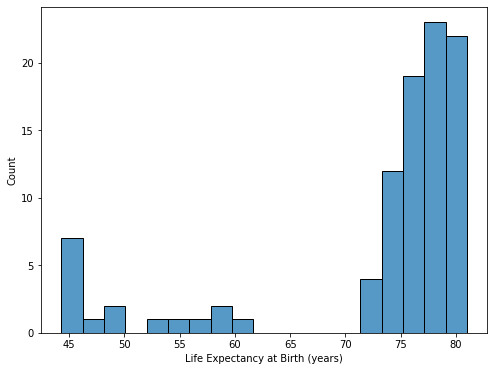

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(gdp_data['LEABY'])
plt.xlabel('Life Expectancy at Birth (years)')
plt.show()
plt.clf()

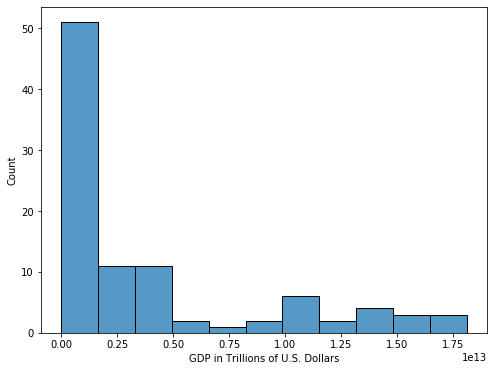

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(df.GDP)
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.show()
plt.clf()

In [19]:
dfMeans = df.groupby('Country').mean().reset_index()

In [21]:
dfMeans

,Country,Year,LEABY,GDP
0,Chile,2007.5,78.94375,1.697888e+11
1,China,2007.5,74.26250,4.957714e+12
2,Germany,2007.5,79.65625,3.094776e+12
3,Mexico,2007.5,75.71875,9.766506e+11
4,United States of America,2007.5,78.06250,1.407500e+13
5,Zimbabwe,2007.5,50.09375,9.062580e+09


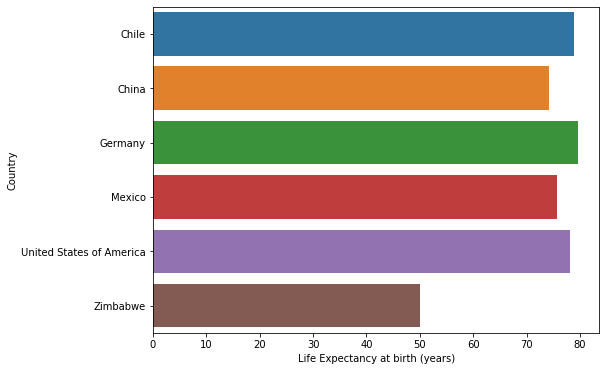

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y='Country', data=dfMeans)
plt.xlabel("Life Expectancy at birth (years)")
plt.show()
plt.clf()

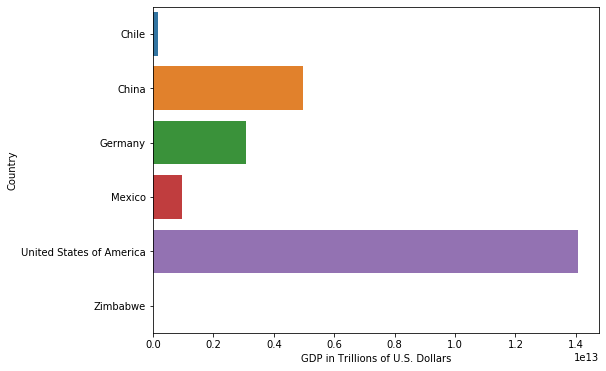

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x='GDP', y='Country', data=dfMeans)
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.show()
plt.clf()

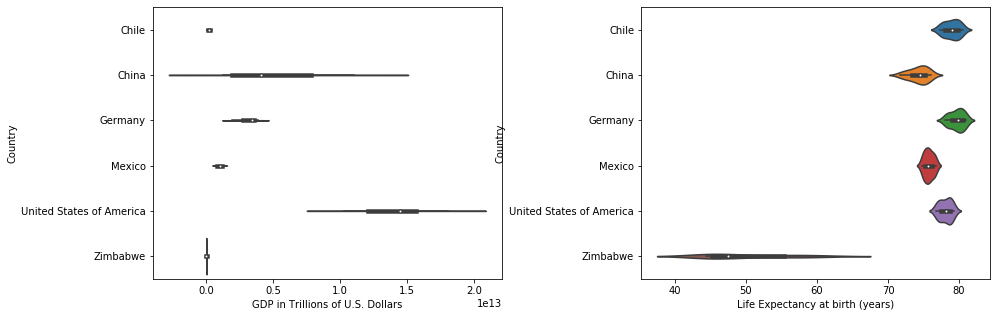

In [36]:
plt.figure(figsize=(15,5))

#First Subplot
ax1 = plt.subplot(1,2,1)
sns.violinplot(x=df.GDP, y=df.Country)
ax1.set_xlabel('GDP in Trillions of U.S. Dollars')

#Second Subplot
ax2 = plt.subplot(1,2,2)
sns.violinplot(x=df.LEABY, y=df.Country)
ax2.set_xlabel('Life Expectancy at birth (years)')

plt.subplots_adjust(wspace=0.4)

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

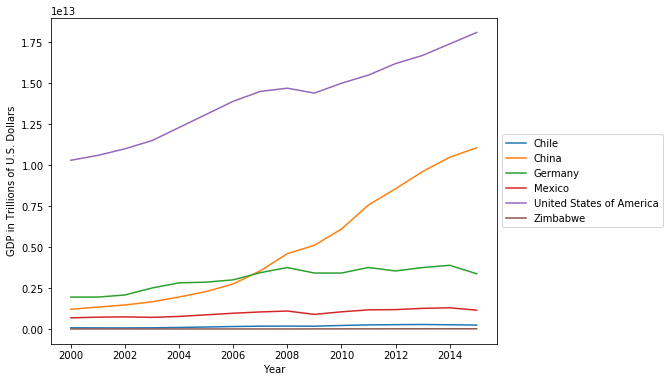

In [38]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('GDP in Trillions of U.S. Dollars')

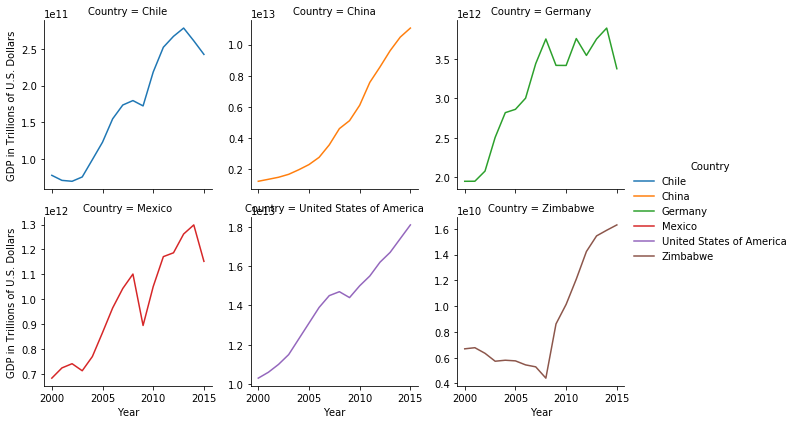

In [44]:
graphGDP = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,'Year','GDP')
           .add_legend()
           .set_axis_labels('Year','GDP in Trillions of U.S. Dollars'))
            
graphGDP

Text(0, 0.5, 'Life Expectancy at birth (years)')

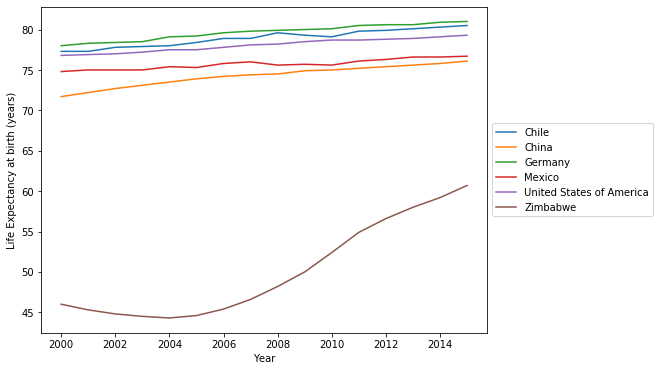

In [45]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life Expectancy at birth (years)')

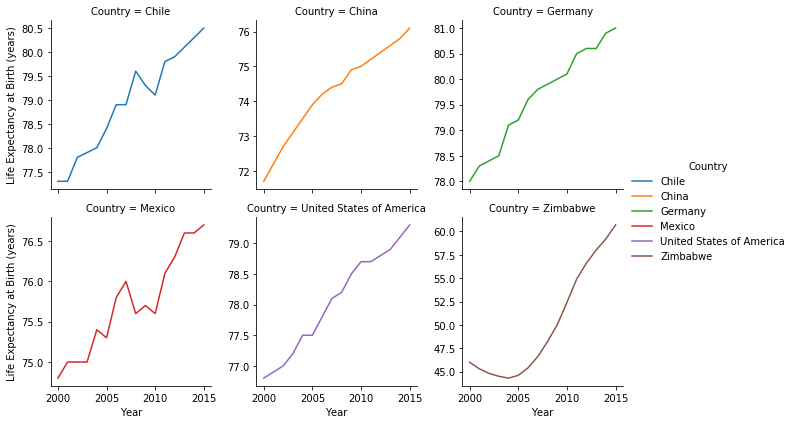

In [46]:
graphLEABY = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)

graphLEABY = (graphLEABY.map(sns.lineplot,'Year','LEABY')
             .add_legend()
             .set_axis_labels('Year', 'Life Expectancy at Birth (years)'))
graphLEABY

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

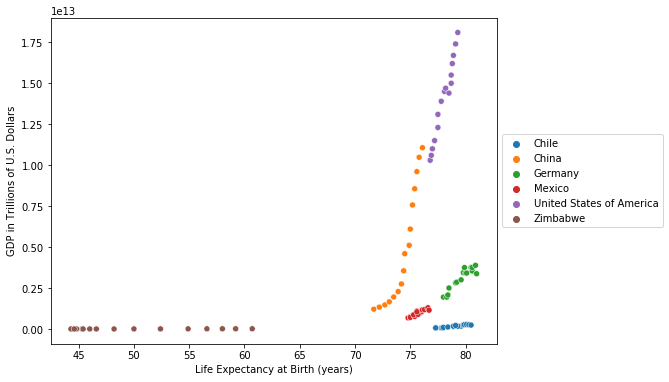

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.LEABY, y = df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol =1)
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('GDP in Trillions of U.S. Dollars')


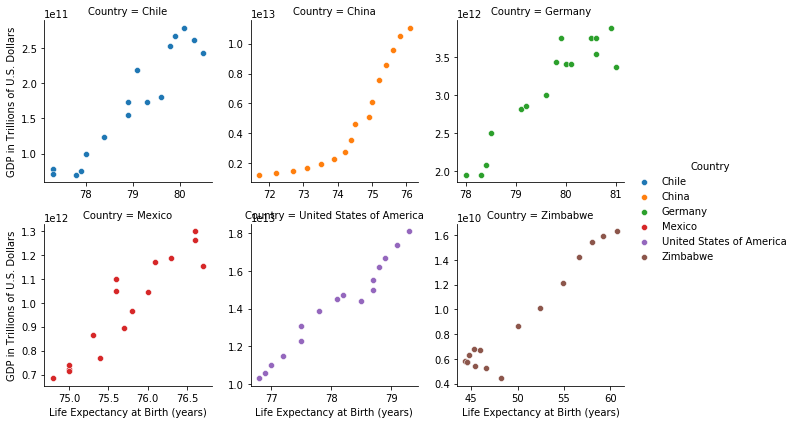

In [49]:
graphGDPLEABY = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False, sharex=False)
graphGDPLEABY = (graphGDPLEABY.map(sns.scatterplot,'LEABY','GDP')
                .add_legend()
                .set_axis_labels('Life Expectancy at Birth (years)', 'GDP in Trillions of U.S. Dollars'))
graphGDPLEABY